[*********************100%***********************]  1 of 1 completed


<Axes: ylabel='USD_INR'>

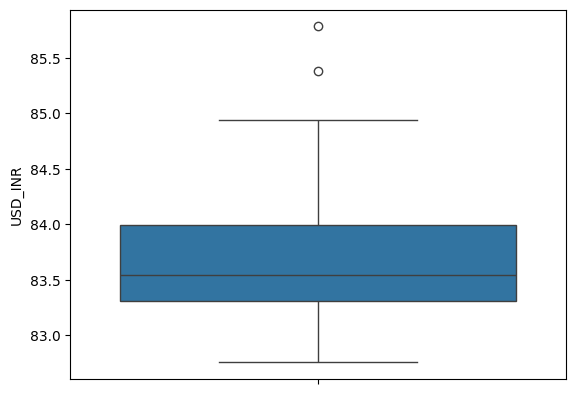

In [ ]:
import yfinance as yf
from google.colab import files
import pandas as pd
import seaborn as sns


#111111 Stage -1 Data Collection

usd_inr = yf.download('USDINR=x', start='2024-01-01', end='2024-12-31', interval='1wk' )
#type(usd_inr)
usd_inr.reset_index(inplace=True)
usd_inr.head()
#keep only relavent colums
usd_inr = usd_inr[['Date', 'Close']]
usd_inr.columns = ['Date', 'Close']
usd_inr.head()
gold_dataset=pd.read_csv('Gold vs USDINR.csv')


#gold_dataset.head()

#222222 Stage -2 DATA ANALYSIS AND CLEANING

gold_dataset['Goldrate'] = gold_dataset['Goldrate'].replace("₹", "", regex=True).replace(",", "", regex=True).astype(float)
gold_dataset.head()
#find outliers using seaborn
sns.boxplot(gold_dataset['USD_INR'])



In [ ]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


<Axes: xlabel='USD_INR', ylabel='Goldrate'>

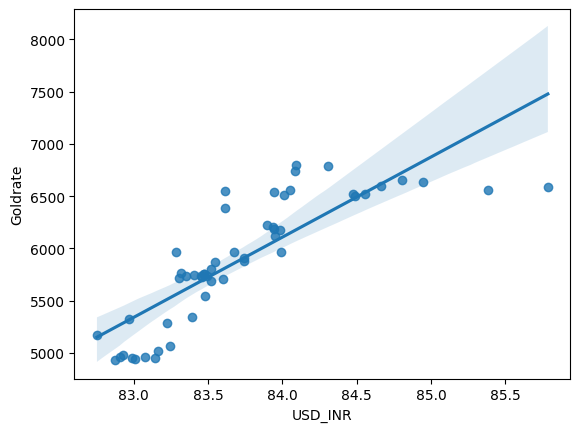

In [ ]:
sns.regplot(x='USD_INR', y='Goldrate', data=gold_dataset)

In [ ]:
#Model Training

#We only need dataframe  > fundamental data structure that organizes data into a two-dimensional table, resembling a spreadsheet or a relational database table.

import yfinance as yf
from google.colab import files
import pandas as pd
import seaborn as sns

gold_dataset=pd.read_csv('Gold vs USDINR.csv')
gold_dataset['Goldrate'] = gold_dataset['Goldrate'].replace("₹", "", regex=True).replace(",", "", regex=True).astype(float)


#3333333 Stage -3 Model TRAINING

x = gold_dataset[['USD_INR']]
y = gold_dataset[['Goldrate']]
#x
# Now we need to split, For both Train and Test. In sklearn train test split.
#sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)
#split Both train and test data's
X_train.shape,X_test.shape



((47, 1), (6, 1))

In [ ]:
#Standardize
#standard scaler (used to standariztion )

#Standardize features by removing the mean and scaling to unit variance.

#class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Train scale
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#fit_transform(X, y=None, **fit_params)[source]
#Fit to data, then transform it.
X_test_scaled


array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [ ]:
#Build a Model using Linear Regression
#class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, tol=1e-06, n_jobs=None, positive=False)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)

#Model is fitted with out datasets
#Check what all parameters used to build and train, use get params






LinearRegression()

In [ ]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
#End goal (hθx = θ0 + θ1x or y = mx+c)

#slope m or θ1 = regressor.coef_
#c or θ0 = regressor.intercept_

#slope m or θ1 = regressor.coef_
regressor.coef_


array([[469.20755762]])

In [ ]:
#c or θ0 = regressor.intercept_
regressor.intercept_

array([5878.57340426])

In [ ]:
#hθx = θ0 + θ1x

θ1 = regressor.coef_[0][0]
θ0 = regressor.intercept_[0]

θ0 , θ1

(np.float64(5878.573404255313), np.float64(469.2075576153299))

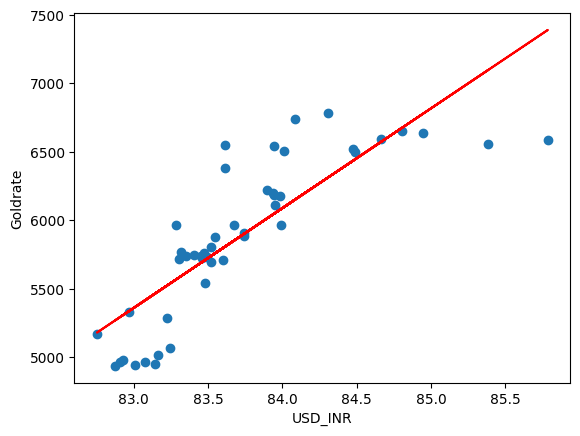

In [ ]:
#Going to predict

import matplotlib.pyplot as plt
X_train_predict = regressor.predict(X_train_scaled)
plt.scatter(X_train, y_train)
#Here is where we found best fit line or predict
plt.plot(X_train, X_train_predict, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")

plt.show()


In [ ]:
#Sclaed is very importent > After sclaed only we should predict and also after scaled only we should train

#Now test using test data

X_test_predicted = regressor.predict(X_test_scaled)
X_test_predicted

array([[5702.05943009],
       [6127.70978702],
       [6494.65358787],
       [5645.83421639],
       [6155.1992781 ],
       [5348.52935023]])

In [ ]:
y_test

,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90


In [ ]:
#4444444 Stage-4 HYPERPARAMETER OPTIMIZATION

#Using linear regression alg , USe all parameters and optimization , Which will be best fit for alg

from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False], 'fit_intercept':[True,False], 'n_jobs':[1,5,10,15,None], 'positive':[True,False]}

search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)
#search.fit(X_train, y_train)



In [ ]:
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [ ]:
#Use above model and check or tuning
search.best_params_
#tuned_model = LinearRegression

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [ ]:
tuned_model = LinearRegression(positive= True, n_jobs=1, fit_intercept= True, copy_X= True)
tuned_model.fit(X_train_scaled, y_train)


LinearRegression(n_jobs=1, positive=True)

In [ ]:
tuned_model.coef_

array([[469.20755762]])

In [ ]:
tuned_model.intercept_

array([5878.57340426])

In [ ]:
#555555555 Stage 5 - MLOPS

#555555555 Stage 5 - MLOPS
#Save the model
#Build the interface
#Connect the model and interface

#Pickle > serlialization(convert to 1's and 0's)

import pickle

#Store our model and its values to regressor.pkl format

pickle.dump(regressor, open('regressor.pkl', 'wb'))



In [ ]:
regressor_reloaded = pickle.load(open('regressor.pkl', 'rb'))


In [ ]:
regressor_reloaded.coef_

array([[469.20755762]])

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))



In [ ]:
#gradio > Used to create interface / UI
#APP.py
import gradio as gr
import pickle
import numpy as np

scaler1 = pickle.load(open('regressor.pkl','rb'))
model1 = pickle.load(open('scaler.pkl','rb'))

def calculate_goldrate(usd_inr):
  scaled_input =scaler1.transform(np.array(usd_inr).reshape(1,-1))
  return round(model1.predict(scaled_input)[0][0],2)

demo = gr.Interface( fn = calculate_goldrate, inputs=["number"], outputs=["number"], title="How much is 1gm of gold in india Now??")

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a83ee9747a70a90371.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
